In [2]:
from obspy.core import read
import glob

#path = "/home/felipe/tmp/Separando_eventos/dados/2022_SDS/LS/tudo/"

#files = glob.glob(path + "*")

#file = ["LS.JAC1..HHZ.D.2022.063",
#        "LS.JAC1..HHE.D.2022.063",
#        "LS.JAC1..HHN.D.2022.063",
#        "LS.JAC2..HHZ.D.2022.063",
#        "LS.JAC2..HHE.D.2022.063",
#        "LS.JAC2..HHN.D.2022.063",
#        "LS.JAC3..HHZ.D.2022.063",
#        "LS.JAC3..HHE.D.2022.063",
#        "LS.JAC3..HHN.D.2022.063",
        

#         "LS.JAC3..HHZ.D.2022.063",

#         "LS.JAC4..HHZ.D.2022.063"]

#st = read(files[0])

st = read("https://examples.obspy.org/ev0_6.a01.gse2")

#st = st.select(component="Z")

tr = st[0]

In [10]:
files[0]

'/home/felipe/tmp/Separando_eventos/dados/2022_SDS/LS/tudo/LS.JAC6..HHZ.D.2022.063'

In [3]:
print(tr.stats)

         network: 
         station: EV0_6
        location: 
         channel: EHZ
       starttime: 1970-01-01T01:00:00.000000Z
         endtime: 1970-01-01T01:00:59.995000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 12000
           calib: 1.0
         _format: GSE2
            gse2: AttribDict({'auxid': '', 'datatype': 'CM6', 'calper': 1.0, 'instype': '', 'hang': 0.0, 'vang': -1.0})


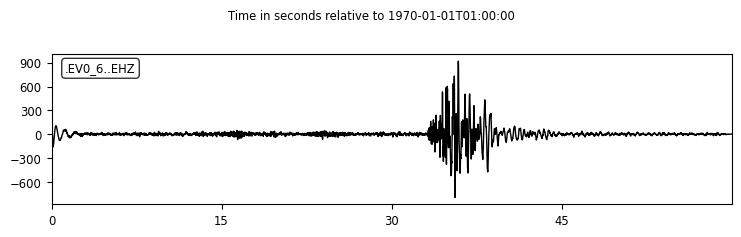

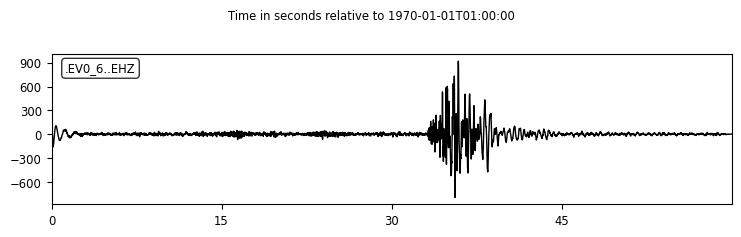

In [4]:
tr.plot(type="relative")

In [5]:
from obspy.signal.trigger import classic_sta_lta

help(classic_sta_lta)

Help on function classic_sta_lta in module obspy.signal.trigger:

classic_sta_lta(a, nsta, nlta)
    Computes the standard STA/LTA from a given input array a. The length of
    the STA is given by nsta in samples, respectively is the length of the
    LTA given by nlta in samples.
    
    Fast version written in C.
    
    :type a: NumPy :class:`~numpy.ndarray`
    :param a: Seismic Trace
    :type nsta: int
    :param nsta: Length of short time average window in samples
    :type nlta: int
    :param nlta: Length of long time average window in samples
    :rtype: NumPy :class:`~numpy.ndarray`
    :return: Characteristic function of classic STA/LTA



In [6]:
from obspy.signal.trigger import plot_trigger

In [7]:
df = tr.stats.sampling_rate

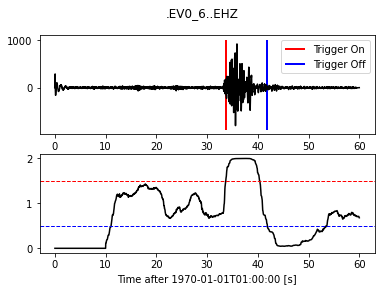

In [9]:
from obspy.signal.trigger import classic_sta_lta

cft = classic_sta_lta(tr.data, int(5 * df), int(10 * df))

plot_trigger(tr, cft, 1.5, 0.5)

In [17]:
df

100.0

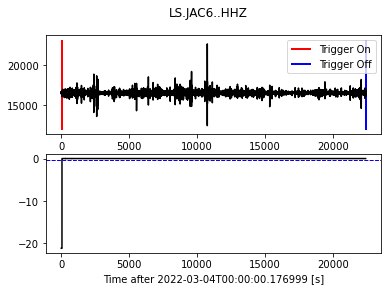

In [18]:
from obspy.signal.trigger import z_detect

cft = z_detect(tr.data, int(50 * df))

plot_trigger(tr, cft, -0.4, -0.3)

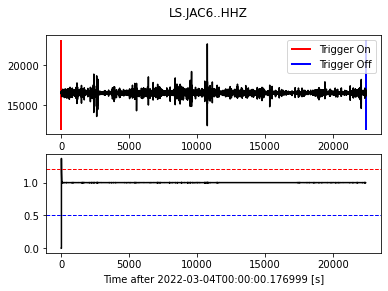

In [19]:
from obspy.signal.trigger import recursive_sta_lta

cft = recursive_sta_lta(tr.data, int(5 * df), int(10 * df))

plot_trigger(tr, cft, 1.2, 0.5)

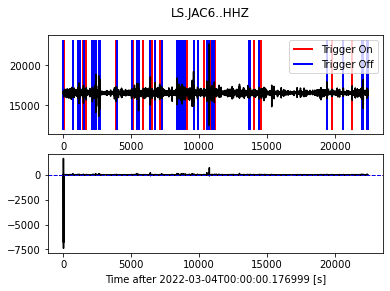

In [20]:
from obspy.signal.trigger import carl_sta_trig

cft = carl_sta_trig(tr.data, int(5 * df), int(10 * df), 0.8, 0.8)

plot_trigger(tr, cft, 20.0, -20.0)

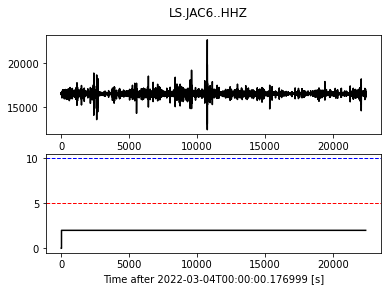

In [21]:
from obspy.signal.trigger import delayed_sta_lta

cft = delayed_sta_lta(tr.data, int(5 * df), int(10 * df))

plot_trigger(tr, cft, 5, 10)

In [22]:
from obspy.core import Stream, read

st = Stream()

path = "/home/felipe/tmp/Separando_eventos/dados/2022_SDS/LS/tudo/"


files = ["LS.JAC1..HHZ.D.2022.063",

         "LS.JAC2..HHZ.D.2022.063",

         "LS.JAC3..HHZ.D.2022.063",

         "LS.JAC4..HHZ.D.2022.063"]

for filename in files:

    st += read(path + filename)


In [28]:
st.filter('bandpass', freqmin=10, freqmax=20)  # optional prefiltering

35 Trace(s) in Stream:

LS.JAC1..HHZ | 2022-03-04T00:00:02.810000Z - 2022-03-05T00:00:02.090000Z | 100.0 Hz, 8639929 samples
...
(33 other traces)
...
LS.JAC4..HHZ | 2022-03-04T21:40:32.011999Z - 2022-03-05T00:00:03.811999Z | 100.0 Hz, 837181 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [29]:


from obspy.signal.trigger import coincidence_trigger

st2 = st.copy()

trig = coincidence_trigger("recstalta", 3.5, 1, st2, 3, sta=0.5, lta=10)

In [24]:
from pprint import pprint

pprint(trig)

[{'coincidence_sum': 3.0,
  'duration': 9.831000089645386,
  'similarity': {},
  'stations': ['JAC1', 'JAC4', 'JAC2'],
  'time': UTCDateTime(2022, 3, 4, 1, 30, 3, 700000),
  'trace_ids': ['LS.JAC1..HHZ', 'LS.JAC4..HHZ', 'LS.JAC2..HHZ']},
 {'coincidence_sum': 3.0,
  'duration': 6.989000082015991,
  'similarity': {},
  'stations': ['JAC1', 'JAC4', 'JAC2'],
  'time': UTCDateTime(2022, 3, 4, 2, 52, 21, 10000),
  'trace_ids': ['LS.JAC1..HHZ', 'LS.JAC4..HHZ', 'LS.JAC2..HHZ']},
 {'coincidence_sum': 3.0,
  'duration': 6.496999979019165,
  'similarity': {},
  'stations': ['JAC1', 'JAC4', 'JAC2'],
  'time': UTCDateTime(2022, 3, 4, 2, 54, 36, 430000),
  'trace_ids': ['LS.JAC1..HHZ', 'LS.JAC4..HHZ', 'LS.JAC2..HHZ']},
 {'coincidence_sum': 3.0,
  'duration': 4.269999980926514,
  'similarity': {},
  'stations': ['JAC4', 'JAC3', 'JAC2'],
  'time': UTCDateTime(2022, 3, 4, 2, 55, 29, 19000),
  'trace_ids': ['LS.JAC4..HHZ', 'LS.JAC3..HHZ', 'LS.JAC2..HHZ']},
 {'coincidence_sum': 3.0,
  'duration': 3.33800

In [25]:
st2 = st.copy()

trig = coincidence_trigger("recstalta", 3.5, 1, st2, 3, sta=0.5, lta=10,

                          details=True)

In [26]:
pprint(trig[0])

{'cft_peak_wmean': 8.6878423323005602,
 'cft_peaks': [11.305655935219043, 9.0892874485294151, 5.6685836131532215],
 'cft_std_wmean': 2.0939749249141939,
 'cft_stds': [3.2392373710998115, 1.8843307533659479, 1.1583566502768219],
 'coincidence_sum': 3.0,
 'duration': 9.831000089645386,
 'similarity': {},
 'stations': ['JAC1', 'JAC4', 'JAC2'],
 'time': UTCDateTime(2022, 3, 4, 1, 30, 3, 700000),
 'trace_ids': ['LS.JAC1..HHZ', 'LS.JAC4..HHZ', 'LS.JAC2..HHZ']}
